<a href="https://colab.research.google.com/github/rachittayal123/advanced-computer-vision-n-video-analytics/blob/main/lab_6_rachit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rachit e22cseu0118

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

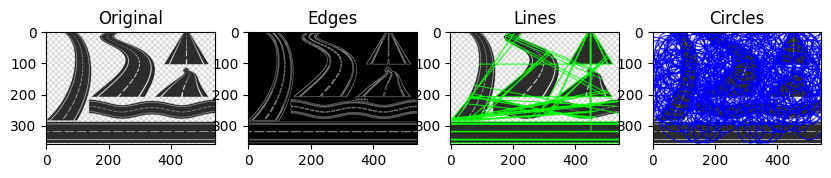

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def region_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return thresh

def detect_lines(image, edges):
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

def detect_circles(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=10, maxRadius=100)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)

def main():
    image = cv2.imread('/kaggle/input/image-folder/road.jpeg')  # Change to your image file
    edges = detect_edges(image)
    segmented_image = region_based_segmentation(image)

    line_image = image.copy()
    detect_lines(line_image, edges)

    circle_image = image.copy()
    detect_circles(circle_image)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 4, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.subplot(1, 4, 2), plt.imshow(edges, cmap='gray'), plt.title('Edges')
    plt.subplot(1, 4, 3), plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)), plt.title('Lines')
    plt.subplot(1, 4, 4), plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB)), plt.title('Circles')
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 19.9 MB/s eta 0:00:0000:01


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="cifar100", epochs=10, imgsz=32)

Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=cifar100, epochs=10, time=None, patience=100, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

train: Scanning /kaggle/working/datasets/cifar100/train... 50000 images, 0 corrupt: 100%|██████████| 50000/50000 [00:00<?, ?it/s]
val: Scanning /kaggle/working/datasets/cifar100/test... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.6e-05, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 74.82it/s]

                   all     0.0761      0.211



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 75.55it/s]

                   all      0.188       0.45



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 75.64it/s]

                   all      0.262      0.549



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 80.73it/s]

                   all      0.306      0.607



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 73.04it/s]

                   all      0.326      0.632



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 81.65it/s]

                   all      0.346      0.658



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 73.31it/s]

                   all      0.357      0.671



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 74.60it/s]


                   all      0.367      0.681

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 78.58it/s]

                   all      0.378      0.687



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.166G      2.976         16         32: 100%|██████████| 3125/3125 [01:56<00:00, 26.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 78.57it/s]

                   all       0.38      0.693



10 epochs completed in 0.344 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.4MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.4MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,654,124 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /kaggle/working/datasets/cifar100/train... found 50000 images in 100 classes ✅ 
val: /kaggle/working/datasets/cifar100/test... found 10000 images in 100 classes ✅ 
test: /kaggle/working/datasets/cifar100/test... found 10000 images in 100 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 87.03it/s]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.381      0.693
Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


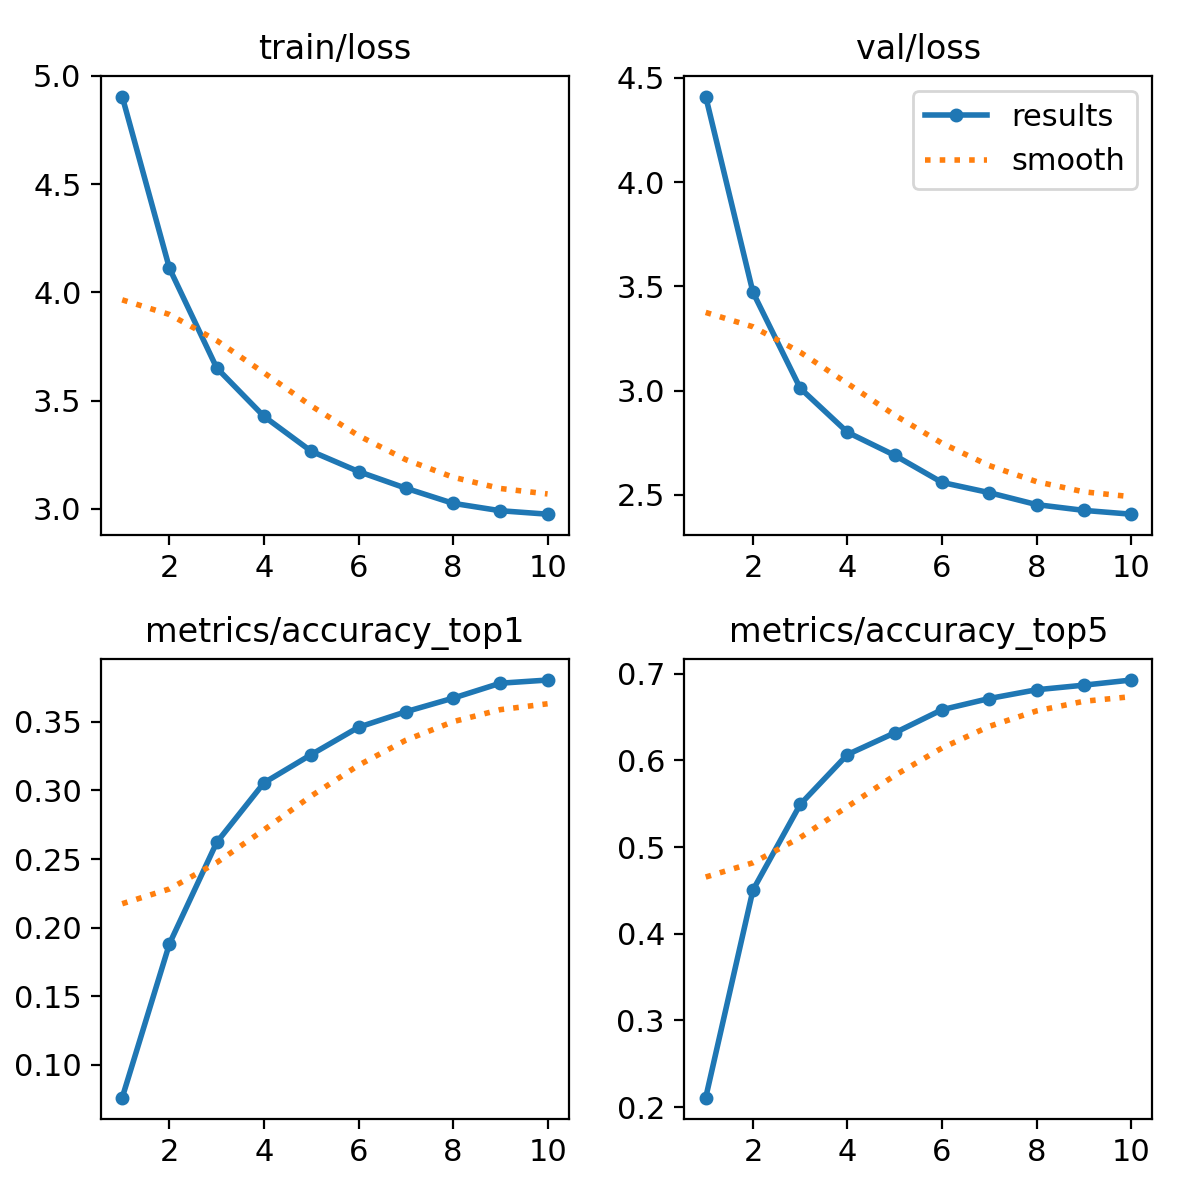

In [ ]:
from IPython.display import display
from PIL import Image

img_path = "/kaggle/working/runs/classify/train2/results.png"
img = Image.open(img_path)
display(img)


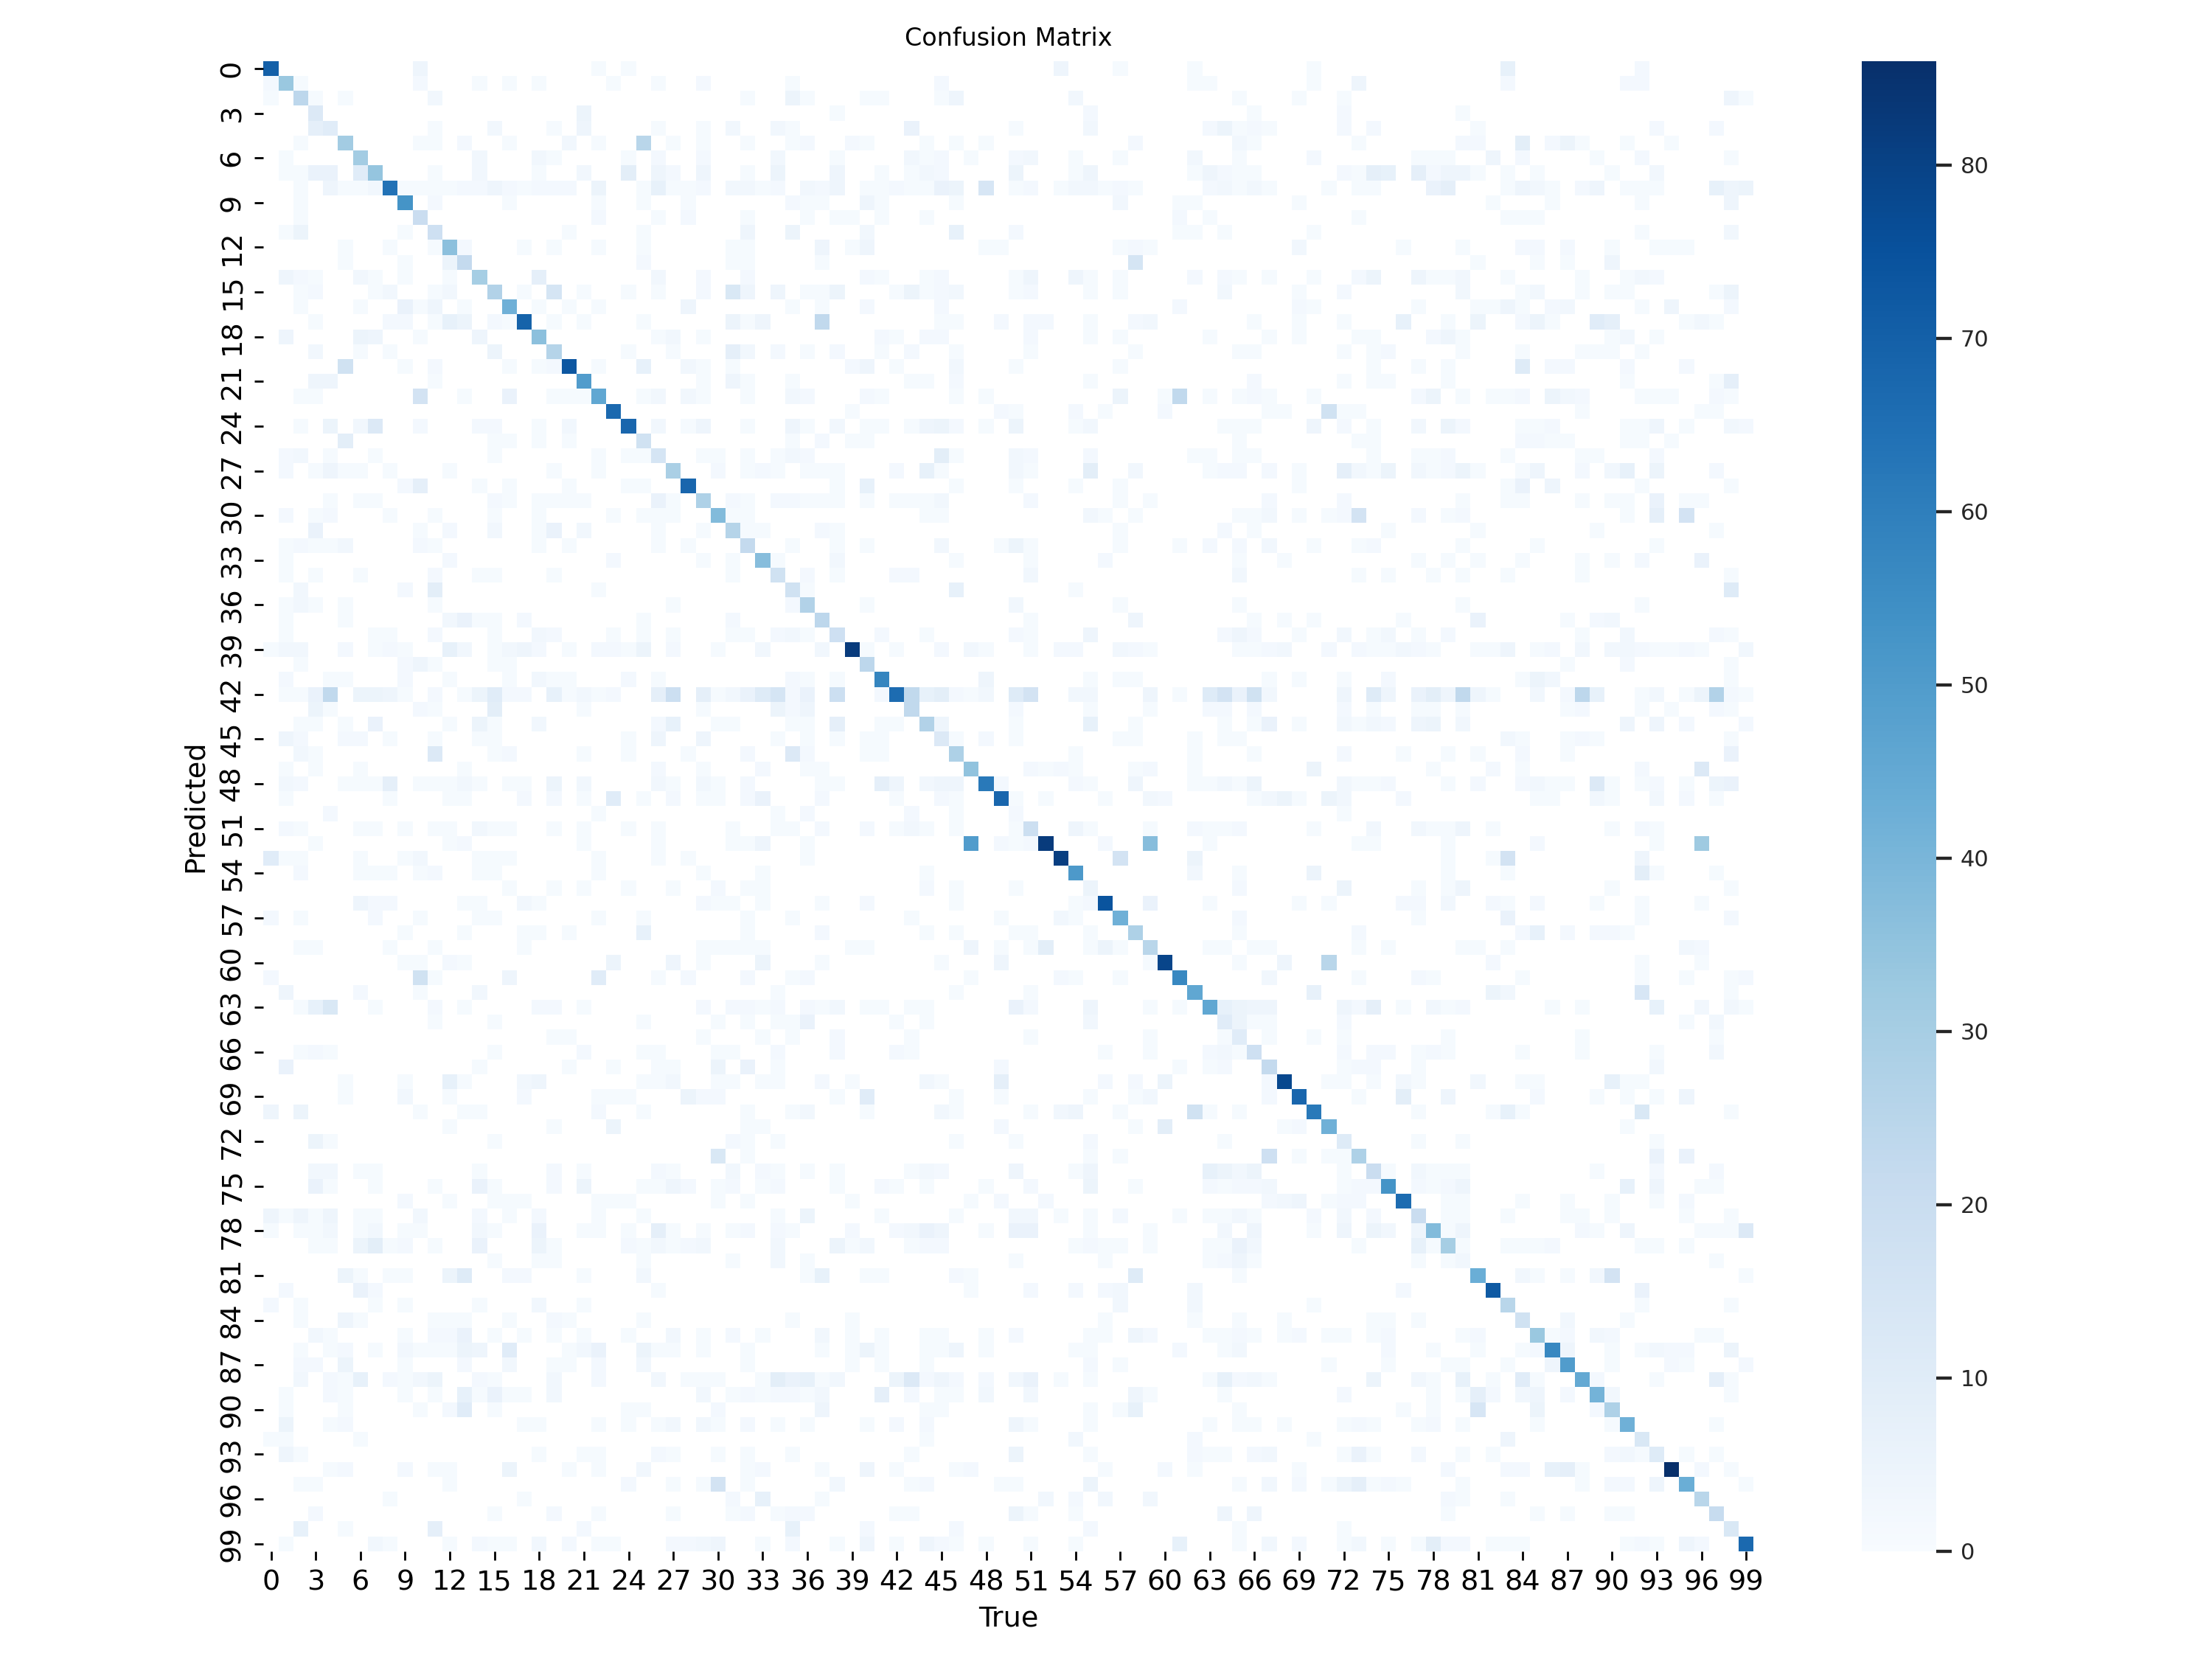

In [ ]:
img_path = "/kaggle/working/runs/classify/train2/confusion_matrix.png"
img = Image.open(img_path)
display(img)

In [ ]:
# lets do faster rcnn

In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
import torchvision.transforms as T
import numpy as np

# Custom dataset class with proper transform handling
class CIFAR100Detection(torch.utils.data.Dataset):
    def __init__(self, root, train=True, transforms=None):
        self.cifar100 = CIFAR100(root, train=train, download=True)
        self.transforms = transforms
        self.classes = self.cifar100.classes

    def __getitem__(self, idx):
        img, label = self.cifar100[idx]

        # Convert PIL image to tensor
        img = T.ToTensor()(img)

        # Create bounding box (entire image)
        boxes = torch.tensor([[0, 0, 32, 32]], dtype=torch.float32)
        labels = torch.tensor([label + 1], dtype=torch.int64)  # +1 for background

        target = {"boxes": boxes, "labels": labels}

        # Apply transforms only to the image
        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.cifar100)

# Transform function - now only for images
def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    # We've moved ToTensor() into the dataset class
    return T.Compose(transforms)

# Create datasets
train_dataset = CIFAR100Detection(
    root='./data',
    train=True,
    transforms=get_transform(train=True)
)
test_dataset = CIFAR100Detection(
    root='./data',
    train=False,
    transforms=get_transform(train=False)
)

# DataLoader with collate function
def collate_fn(batch):
    return tuple(zip(*batch))

train_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=2
)
test_loader = DataLoader(
    test_dataset,
    batch_size=4,
    shuffle=False,
    collate_fn=collate_fn,
    num_workers=2
)

# Model setup (same as before)
def get_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

num_classes = 101  # 100 classes + background
model = get_model(num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training function (fixed)
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    print(f"Epoch {epoch} Loss: {losses.item()}")

# Optimizer and scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)
    lr_scheduler.step()
    torch.save(model.state_dict(), f"fasterrcnn_cifar100_epoch_{epoch+1}.pth")

Files already downloaded and verified


KeyboardInterrupt: 

In [ ]:
import torch
import torchvision
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader, Subset
import torchvision.transforms as T
import numpy as np

# Select specific classes
selected_classes = [0, 1, 2]  # Change these to desired class indices
max_images_per_class = 100

# Custom dataset class to filter specific classes and limit images
class FilteredCIFAR100(torch.utils.data.Dataset):
    def __init__(self, root, train=True, transforms=None):
        self.cifar100 = CIFAR100(root, train=train, download=True)
        self.transforms = transforms
        self.classes = self.cifar100.classes

        # Filter indices
        self.filtered_indices = []
        class_counts = {cls: 0 for cls in selected_classes}

        for idx, (_, label) in enumerate(self.cifar100):
            if label in selected_classes and class_counts[label] < max_images_per_class:
                self.filtered_indices.append(idx)
                class_counts[label] += 1

        print(f"Selected classes: {[self.classes[i] for i in selected_classes]}")
        print(f"Total images in dataset: {len(self.filtered_indices)}")

    def __getitem__(self, idx):
        img, label = self.cifar100[self.filtered_indices[idx]]
        img = T.ToTensor()(img)
        boxes = torch.tensor([[0, 0, 32, 32]], dtype=torch.float32)
        labels = torch.tensor([label + 1], dtype=torch.int64)  # +1 for background
        target = {"boxes": boxes, "labels": labels}
        if self.transforms is not None:
            img = self.transforms(img)
        return img, target

    def __len__(self):
        return len(self.filtered_indices)

# Transform function
def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

# Create filtered datasets
train_dataset = FilteredCIFAR100(root='./data', train=True, transforms=get_transform(train=True))
test_dataset = FilteredCIFAR100(root='./data', train=False, transforms=get_transform(train=False))

# DataLoader with collate function
def collate_fn(batch):
    return tuple(zip(*batch))

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn, num_workers=2)

# Model setup
def get_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
    return model

num_classes = len(selected_classes) + 1  # Selected classes + background
model = get_model(num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training function
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    running_loss = 0.0
    for i, (images, targets) in enumerate(data_loader):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        running_loss += losses.item()
        if (i + 1) % 10 == 0:
            print(f"Epoch {epoch}, Step {i + 1}/{len(data_loader)}, Loss: {losses.item():.4f}")

    avg_loss = running_loss / len(data_loader)
    print(f"Epoch {epoch} Completed, Average Loss: {avg_loss:.4f}")

# Optimizer and scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)
    lr_scheduler.step()
    torch.save(model.state_dict(), f"fasterrcnn_cifar100_filtered_epoch_{epoch+1}.pth")

100%|██████████| 169M/169M [00:02<00:00, 76.1MB/s] 


Extracting ./data/cifar-100-python.tar.gz to ./data
Selected classes: ['apple', 'aquarium_fish', 'baby']
Total images in dataset: 300
Files already downloaded and verified
Selected classes: ['apple', 'aquarium_fish', 'baby']
Total images in dataset: 300


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:03<00:00, 42.5MB/s] 


Epoch 0, Step 10/75, Loss: 0.1738
Epoch 0, Step 20/75, Loss: 0.1571
Epoch 0, Step 30/75, Loss: 0.1324
Epoch 0, Step 40/75, Loss: 0.1055
Epoch 0, Step 50/75, Loss: 0.0844
Epoch 0, Step 60/75, Loss: 0.0777
Epoch 0, Step 70/75, Loss: 0.0787
Epoch 0 Completed, Average Loss: 0.1468
Epoch 1, Step 10/75, Loss: 0.0706
Epoch 1, Step 20/75, Loss: 0.0516
Epoch 1, Step 30/75, Loss: 0.0531
Epoch 1, Step 40/75, Loss: 0.0594
Epoch 1, Step 50/75, Loss: 0.0599
Epoch 1, Step 60/75, Loss: 0.0587
Epoch 1, Step 70/75, Loss: 0.0447
Epoch 1 Completed, Average Loss: 0.0568


In [ ]:
from torchvision.ops import box_iou

# Evaluation function
def evaluate(model, data_loader, device):
    model.eval()
    total_iou = 0
    total_samples = 0
    with torch.no_grad():
        for images, targets in data_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            outputs = model(images)

            for output, target in zip(outputs, targets):
                pred_boxes = output["boxes"]
                gt_boxes = target["boxes"]

                if len(pred_boxes) > 0 and len(gt_boxes) > 0:
                    iou = box_iou(pred_boxes, gt_boxes).mean().item()
                    total_iou += iou
                total_samples += 1

    avg_iou = total_iou / total_samples if total_samples > 0 else 0
    print(f"Evaluation completed. Average IoU: {avg_iou:.4f}")

# Optimizer and scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)
    lr_scheduler.step()
    torch.save(model.state_dict(), f"fasterrcnn_cifar100_filtered_epoch_{epoch+1}.pth")

# Run evaluation
evaluate(model, test_loader, device)


Epoch 0, Step 10/75, Loss: 0.0440
Epoch 0, Step 20/75, Loss: 0.0526
Epoch 0, Step 30/75, Loss: 0.0519
Epoch 0, Step 40/75, Loss: 0.0472
Epoch 0, Step 50/75, Loss: 0.0393
Epoch 0, Step 60/75, Loss: 0.0502
Epoch 0, Step 70/75, Loss: 0.0404
Epoch 0 Completed, Average Loss: 0.0488
Epoch 1, Step 10/75, Loss: 0.0434
Epoch 1, Step 20/75, Loss: 0.0436
Epoch 1, Step 30/75, Loss: 0.0409
Epoch 1, Step 40/75, Loss: 0.0381
Epoch 1, Step 50/75, Loss: 0.0502
Epoch 1, Step 60/75, Loss: 0.0333
Epoch 1, Step 70/75, Loss: 0.0405
Epoch 1 Completed, Average Loss: 0.0409
Evaluation completed. Average IoU: 0.2620


<ipython-input-4-a8dc4fbdf222>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("fasterrcnn_cifar100_filtered_epoch_2.pth"))


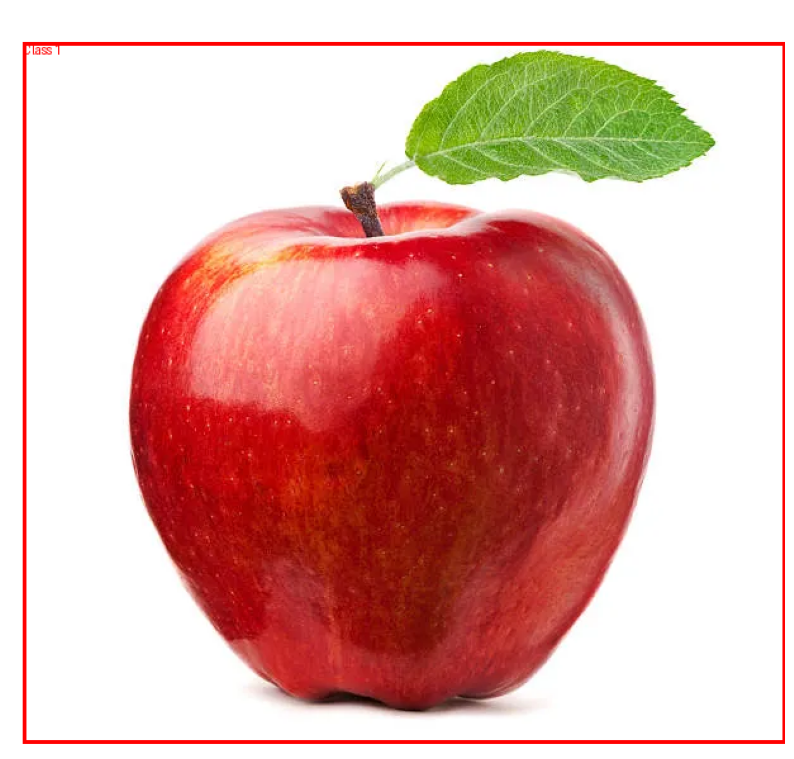

In [ ]:
import torch
import torchvision
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the trained model
model = get_model(num_classes)  # Using the same num_classes
model.load_state_dict(torch.load("fasterrcnn_cifar100_filtered_epoch_2.pth"))
model.eval()

# Ensure the model is on the same device as the input tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Load an image to test (replace 'image.jpeg' with your image path)
image_path = '/kaggle/input/image-rcnn/apple.jpeg'  # Path to your test image
image = Image.open(image_path)

# Preprocess the image (resize and normalize)
transform = get_transform(train=False)
image_tensor = F.to_tensor(image).unsqueeze(0).to(device)  # Move image to the same device as the model

# Perform inference
with torch.no_grad():
    prediction = model(image_tensor)

# Extract predictions
boxes = prediction[0]['boxes'].cpu().numpy()  # Bounding boxes
labels = prediction[0]['labels'].cpu().numpy()  # Predicted labels
scores = prediction[0]['scores'].cpu().numpy()  # Confidence scores

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for i in range(len(boxes)):
    if scores[i] > 0.5:  # Only draw boxes with a confidence score above 0.5
        box = boxes[i]
        label = labels[i]
        # Convert the box coordinates to integers
        xmin, ymin, xmax, ymax = map(int, box)
        draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=3)
        draw.text((xmin, ymin), f'Class {label}', fill='red')

# Show the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()
